# Лабораторная работа 3. Корреляция и свертка

В данной лабораторной работе мы:
* узнаем про корреляцию; 
* выполним свертки сигналов;
* оценим полученный результат.

## Задание 0 Заполнить данные в окне ниже
(для этого необходимо кликнуть два раза на текст ниже)

ФИО студентов: Лисовский Кирилл Алексеевич Никитенко Андрей Михайлович Уксусников Николай Алексеевич Подхватилин Денис Сергеевич Степаненко Дмитрий Владимирович (как пример, номер студ. билета 09106106)

Группа: РИМ-111060 Подгруппа задания: 3

## Подключить необходимые библиотеки

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.fftpack import fft, ifft, fftshift
import scipy as sp

%matplotlib inline

## Задание 1 Реализовать сигналы

### 1.1 Создайте функцию, возвращающую мгновенные значения двух сигналов

$y = sin(ax)+cos(bx)+cos(cx)$, где $a,b,c$ три не равных другдругу числа из номера вашего студенческого билета начиная с конца.  

Пример: номер студенческого билета 09106106 $a=1, b=0, c=6$.

Отобразите графическое представление функции.

In [6]:
def mySignal(a, b, c):
    y = np.sin(a*x) + np.cos(b*x) + np.cos(c*x)
    return y

Text(0.5, 1.0, 'График сигнала y')

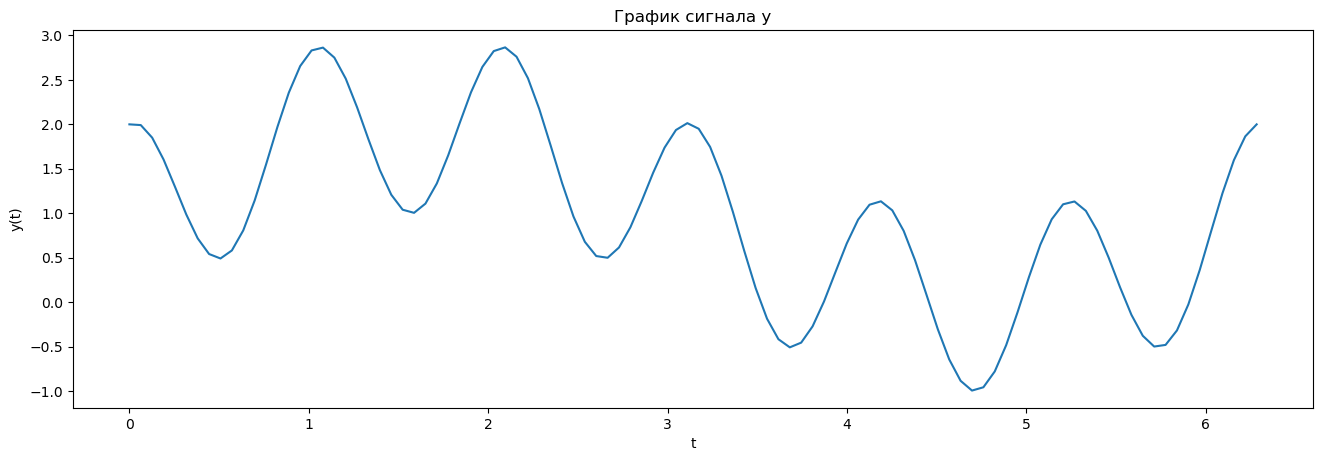

In [12]:
# постройте сигнал
a = 1
b = 0
c = 6

t = np.linspace(0, 2*np.pi, 100)
x = t
s1 = mySignal(a, b, c)

fig = plt.figure(figsize=(16, 5), dpi=100)

plt.plot(t, s1)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('График сигнала y')

## Задание 2 Корреляция

В реальных задачах часто ставится вопрос о степени похожести одного процесса на другого или же о независимости одного процесса от другого. Иными словами, требуется определить взаимосвязь между сигналами, то есть найти корреляцию.  

Методы корреляции используются в широком диапазоне задач: поиск сигналов, компьютерное зрение и обработка изображений, в задачах радиолокации для определения характеристик целей и определения расстояния до объекта. Кроме того, с помощью корреляции производится поиск слабых сигналов в шумах.

В разделе фильтрация сигналов вводилось понятие импульсной характеристики фильтра. Напомним, что **импульсной характеристикой** $h(n)$ называется реакция цепи на входное воздействие в виде функции Дирака ($\delta$-функции). Она отражает влияние цепи на сигнал.

В задачах прохождения сигналов через различные цифровые узлы происходит свертка сигнала с импульсной характеристикой фильтра.

*Корреляцию* между двумя сигналами можно вычислить как сумму произведений пар отсчетов исследуемых сигналов.  

Если взять две абсолютно независимые случайные последовательности, то их сумма произведений стремится к нулю. Говорят, что такие сигналы обладают нулевой корреляцией. Причем, чем длиннее последовательности, тем сильнее результат стремится к нулевому значению.

Корреляция бывает **положительной** и **отрицательной**. Положительная корреляция - большие значения одного сигнала связаны с большими значениями другого сигнала (увеличение одной переменной взаимосвязано с увеличением другой переменной). Отрицательную корреляцию проще всего понимать так: увеличение одной переменной связано с уменьшением другой переменной. 

В терминах функционального пространства сигналов корреляция может быть выражена как косинус угла между векторами. Следовательно, при полном совпадении сигналов степень их связи будет принимать положительное единичное значение, при полной противоположности сигналов - отрицательную единицу, а при полном несовпадении - нулевое значение.

Оценка выборочного коэффициента автокорреляции:

$r(l) = \frac{(N-1)\sum^{N-l}_{i=1}y_iy_{i+l} - (\sum^{N-l}_{i=1}y_i)(\sum^{N-l}_{i=1}y_{i+l})}{((N-1)\sum^{N-l}_{i=1}y_i^2 - (\sum^{N-l}_{i=1}y_i^2)^{(1/2)} ((N-l)\sum^{N-l}_{i=1}y_{i+l}^2 - (\sum^{N-l}_{i=1}y_{i+l})^2)^{(1/2)}}$

### 2.1 Автокорреляционная функция

Автокорреляционная функция (АКФ) - показывает зависимость между сигналом и его копией, сдвинутой по времени. 

АКФ находит применение в кодировании информации. Выбор кодирующей последовательности по параметрам длины, частоты и формы во многом обусловлен корреляционными свойствами этой последовательности. Наилучшая кодовая последовательность обладает наименьшим значением вероятности ложного обнаружения или срабатывания (для детектирования сигналов, для пороговых устройств) или ложной синхронизации (для передачи и приема кодовых последовательностей).

Автокорреляционная функция помогает находить повторяющиеся участки во временной последовательности, с помощью АКФ можно находить несущую частоту сигнала.

Поскольку АКФ есть произведение сигнала и его копии, то физический смысл АКФ - энергия сигнала. В частности, в нулевой момент времени (`n = 0`) АКФ  равна энергии сигнала.

В numpy нет встроенной функции автокорреляции, но её несложно написать самому на базе функции `correlate()`.

### Свойства АКФ

1. АКФ это симметричная и четная функция.
3. Имеет максимум в нуле.
4. АКФ периодической последовательности - периодическая функция.
5. АКФ суммы двух некоррелированных сигналов - сумма АКФ этих сигналов.
6. АКФ бесконечного во времени белого шума имеет пик в нулевом значении и нули во всех остальных.

### АКФ прямоугольного импульса

Пример: Автокорреляционная функция прямоугольного импульса - треугольный сигнал. Ниже будет показано, что корреляция и свертка сигнала с самим собой даёт одинаковый результат.

### Задание: Постройте оценку выборочной автокорреляции первого сигнала несколькими способами:

1. С помощью встроенной библиотеки https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html
2. С помощью библиотеки numpy https://numpy.org/doc/stable/reference/generated/numpy.correlate.html
3. Согласно формуле из теории.

Графики должны получиться одинаковыми. Размер лага оптимальным считается $l \leq \frac{N}{4}$ 

In [92]:
# собственная функция по формуле 
def myautocorr(s, lag): # функция, в которую будут передаваться сигналы
    r=[] # результат
    for l in range(lag): # вычислим r(l) для каждого l
        sum_yiyil = 0
        sum_yi = 0
        sum_yil = 0
        sum_yi2 = 0
        sum_yil2 = 0
        
        for i in range(N-l):
            sum_yiyil += s[i] * s[i+l] # сигнал*сигнал в точке сдвига
            sum_yi += s[i] # сумма сигналов
            sum_yil += s[i+l] # сумма сигналов со сдвигом
            sum_yi2 += s[i]**2 # сумма квадратов сигнала
            sum_yil2 += s[i+l]**2 # сумма квадратов сигнала со сдвигом
        
        r.append(
            ((N-l) * sum_yiyil - sum_yi * sum_yil) /
            (((N-l)* sum_yi2 - sum_yi ** 2) ** 0.5 * ((N-l) * sum_yil2 - sum_yil ** 2) ** 0.5)
        )
    
    return r

Text(0.5, 1.0, 'АКФ numpy')

<Figure size 1900x1300 with 0 Axes>

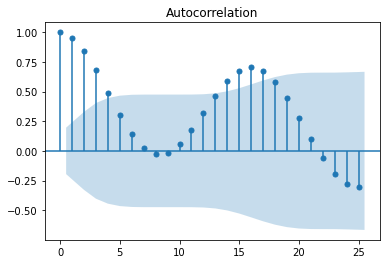

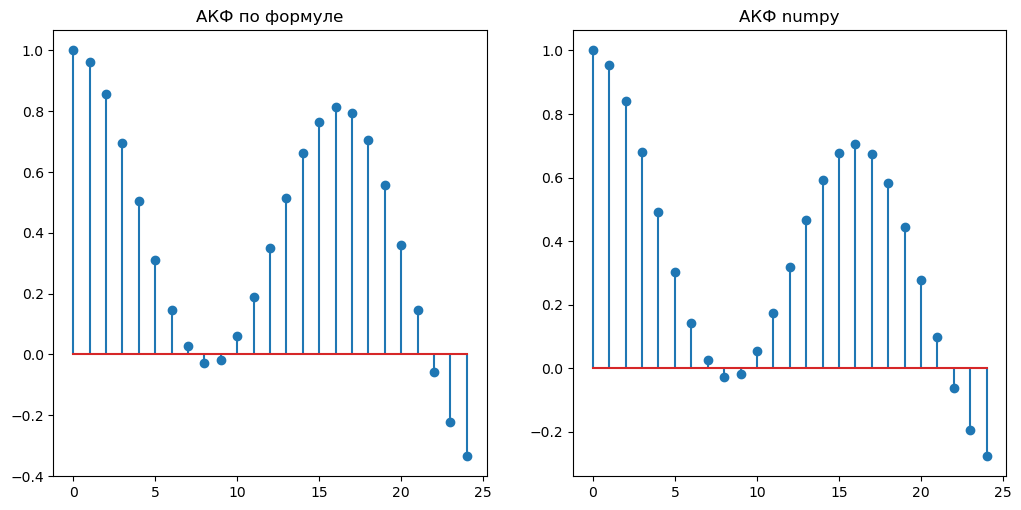

In [93]:
# результат для всех трех пунктов
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

N = len(s1)
lag = int(N / 4) # задаем предельный размер сдвига

fig = plt.figure(figsize=(19, 13), dpi=100)

plot_acf(s1, lags=lag) # рисуем график общекорреляционной функции

# для вычисления потребуется MX и DX!
ACFnp = np.correlate(s1 - np.mean(s1), s1 - np.mean(s1), mode='full')[len(s1)-1:len(s1)-1 + lag]/np.var(s1)/N

ACFmy = myautocorr(s1, lag)


fig = plt.figure(figsize=(19, 13), dpi=100)
plt.subplot(2, 3, 1)
plt.stem(ACFmy)
plt.title("АКФ по формуле")


plt.subplot(2, 3, 2)
plt.stem(ACFnp)
plt.title("АКФ numpy")

## 2.2 Взаимная корреляционная функция

Взаимная корреляционная функция (ВКФ) - стандартный метод оценки степени корреляции двух последовательностей. Она часто используется для поиска в длинной последовательности более короткой заранее известной. Рассмотрим два сигнала $f$ и $g$. 

*Корреляцию* между двумя сигналами можно вычислить как сумму произведений пар отсчетов исследуемых сигналов.

Если взять две абсолютно независимые случайные последовательности, то их сумма произведений стремится к нулю. Говорят, что такие сигналы обладают нулевой корреляцией. Причем, чем длиннее последовательности, тем сильнее результат стремится к нулевому значению.

Корреляция бывает **положительной** и **отрицательной**. Положительная корреляция - большие значения одного сигнала связаны с большими значениями другого сигнала (увеличение одной переменной взаимосвязано с увеличением другой переменной). Отрицательную корреляцию проще всего понимать так: увеличение одной переменной связано с уменьшением другой переменной. 

Формула взаимной корреляции:

$ r_{12} = \frac{1}{N} \sum_{n=0}^{N-1}f(n)g(n)$

Нормирующий множитель $\frac{1}{N}$ применяется для исключения влияния длительности последовательностей.

В терминах функционального пространства сигналов корреляция может быть выражена как косинус угла между векторами. Следовательно, при полном совпадении сигналов степень их связи будет принимать положительное единичное значение, при полной противоположности сигналов - отрицательную единицу, а при полном несовпадении - нулевое значение.

### Задание: Рассчитайте ВКФ функцию двумя способами

1. С помощью https://numpy.org/doc/stable/reference/generated/numpy.correlate.html
2. Собственная функция по формуле

In [94]:
def myCrossCorrelate(x, y):
    sum = 0
    for i in range(N):
        sum += x[i] * y[i]
    sum /= N
    return sum

In [95]:
s1 = np.array([1, 2, 3, 4, 5])
s2 = -1* np.array([1, 2, 3, 4, 5])

N = len(s1)
lag = int(N/4)

VCFmy = myCrossCorrelate(s1, s2)

print('ВКФ по формуле: ',VCFmy)

VCFnp=np.correlate(s1, s2)

print('ВКФ numpy: ', VCFnp/N)

print('Рассчитаем как сумму произведения: ', np.sum(s1*s2)/N)

ВКФ по формуле:  -11.0
ВКФ numpy:  [-11.]
Рассчитаем как сумму произведения:  -11.0


### Ответить на вопрос

Одинаковые ли значения? Почему?
Мы получили одинаковые значения. До применения нормирующего множителя $\frac{1}{N}$ значения были различны.
Корреляция, по своей сути, необходима для оценки степени схожести последовательности сигналов (либо исходного сигнала ~ со своей копией, сдвинутой по времени).

## Задание 3 Свертка

**Свертка** описывает взаимодействие сигналов между собой. Если один из сигналов - импульсная характеристика фильтра, то свертка входной последовательности с импульсной характеристикой есть ни что иное, как реакция цепи на входное воздействие. Иными словами, результирующий сигнал отражает прохождение сигнала через фильтр. 

Как правило, выходной сигнал является запаздывающей (относительно входа) функцией. Кроме того, выходной сигнал может быть усилен или подавлен относительно входного сигнала. 

**Чтобы найти импульсную характеристику цифрового фильтра, необходимо подать на его вход единичный импульс (дельта-функцию), который равен 1 в одной точке и равен 0 во всех остальных точках**  

### Свертка и корреляция

Связь свертки и корреляции достаточно проста: свертка эквивалентна взаимной корреляции двух последовательностей, причем одна из последовательностей обращена во времени относительно другой. В случае с корреляцией, последовательности должны быть одинаковой длины. В случае свертки последовательности могут иметь разную длину, тогда этот процесс называется линейной сверткой. В случае, если длины последовательностей совпадают - это циклическая (круговая) свертка.

### Свойства свертки

1. **Коммутативность**: 

$a*b = b*a$

Из этого выражения вытекает следующее утверждение:

$ \sum_{m=0}^{N-1}a(m)b(n-m) = \sum_{m=0}^{N-1}a(n-m)b(n)$


2. **Дистрибутивность**: 

$a*(b+c) = a*b + a*c$

3. **Ассоциативность**: 

$a*(b*c) = (a*b)*c = (a*c)*b$

Существует два типа свертки - линейная и циклическая (круговая).

### 3.1 Линейная свертка

Линейная свертка двух сигналов $a(n)$ , где $n = 0, ..., N-1$ и $b(n)$,  где $n = 0, ..., M-1$ описывается уравнением:  

$ s(n) = a*b = \sum_{m=0}^{n}a(m)\cdot b(n-m)$

где 
- $n = 0, ..., N+M-2$ ,
- $N$ - длина сигнала $a(n)$ , 
- $M$ - длина сигнала $b(n)$ ,

Вычисление свертки - итеративный процесс, в котором сигналы сдвигают друг относительно друга, затем перемножают и складывают. Предполагается, что сигналы равны нулю вне заданных своих диапазонов, то есть $a(n) = 0$ при $N < n < 0$ и $b(n) = 0$ при $M < n < 0$.

Пошаговое объяснение линейной свёртки

Важно помнить, что второй сигнал сначала инвертируется слева направо, согласно формуле вычисления свертки!

```
`s1 = [1, 2, 3, 4], N = 4`
`s2 = [3, 2, 1], M = 3`

Step 1:
a = [0, 0, 1, 2, 3, 4]
b = [1, 2, 3, 0, 0, 0]

sum of prod = [3]

Step 2: (shift "b" to right at one sample...)
a = [0, 0, 1, 2, 3, 4]
b = [0, 1, 2, 3, 0, 0]

sum of prod = 1*2 + 2*3 = [8]

Step 3:
a = [0, 0, 1, 2, 3, 4]
b = [0, 0, 1, 2, 3, 0]

sum of prod = 1*1 + 2*2 + 3*3 = [14]

Step 4:
a = [0, 0, 1, 2, 3, 4]
b = [0, 0, 0, 1, 2, 3]

sum of prod = 1*2 + 2*3 + 3*4 = [20]

Step 5:
a = [0, 0, 1, 2, 3, 4]
b = [3, 0, 0, 0, 1, 2]

sum of prod = 1*3 + 2*4 = [11]

Step 6:
a = [0, 0, 1, 2, 3, 4]
b = [2, 3, 0, 0, 0, 1]

sum of prod = 1*4 = [4]

Convolution seq = [3, 8, 14, 20, 11, 4]
``` 

### Задание: Линейная свертка

Простейший алгоритм (через циклическую свёртку):

1. Дополняем нулями слева первый сигнал до длины N+M-1.
2. Инвертируем во времени второй сигнал.
3. Дополняем нулями справа второй сигнал до длины N+M-1.
4. В цикле от 0 до N+M-2 сдвигаем второй сигнал вправо (или первый сигнал влево)
5. Вычисляем на каждом шаге цикла произведения элементов и подсчитываем сумму произведений.

#### Реализовать алгоритм свертки


In [96]:
def myconvolve(x,y):
    N = len(x)
    M = len(y)
    conv_seq = []
    for i in range(N, N+M-1):
        x.append(0)
    for i in range(M, N+M-1):
        y.append(0)
    y.reverse()
    for i in range (N+M-1):
        conv_seq.append(np.sum(np.array(x) * np.array(y))) # сумма парных произведений
        y.append(y.pop(0)) # перемещаем в конец вырезанный первый элемент
    conv_seq.reverse()
    return conv_seq

#### Задать сигналы и вычислить линейную свертку

`s1 = [1, 2, 3, 4], N = 4`

`s2 = [3, 2, 1], M = 3`

#### Сравнить полученный результат и значения, вычисленные с помощью встроенной функции `np.convolve()` с параметром `mode='full'` и с `scipy.signal.fftconvolve()` с параметром `mode='full'`.

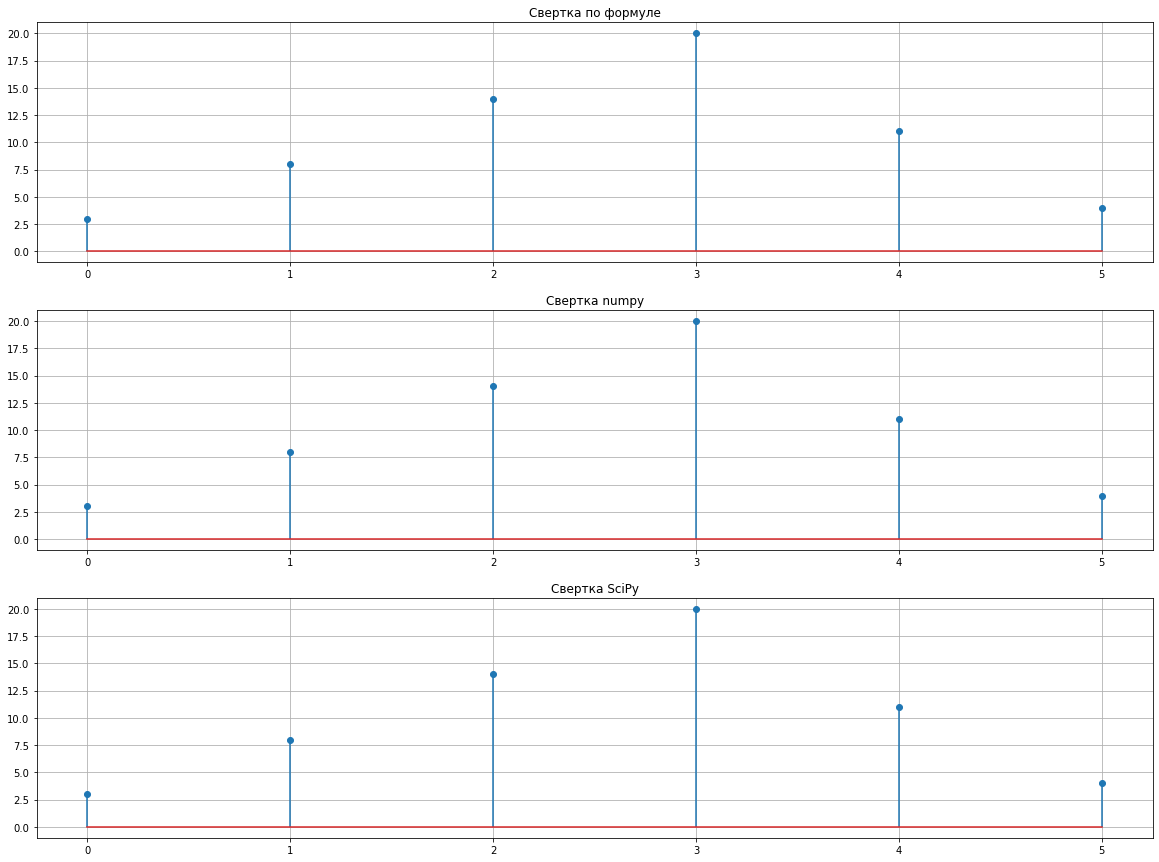

In [97]:
# код
from scipy import signal

# Cсигналы
s1 = [1, 2, 3, 4]
s2 = [3, 2, 1]

# Введём "кортежи" из "списка" первоначальных сигналов, чтобы сохранить их заданные значения
a = tuple(s1)
b = tuple(s2)

convolvemy = myconvolve(s1, s2)
convolvenp = np.convolve(a, b, mode='full')
convolveSCIPY = signal.fftconvolve(a, b, mode='full')


fig = plt.figure(figsize=(20, 15))

plt.subplot(3, 1, 1)
plt.stem(convolvemy)
plt.title('Свертка по формуле')
plt.grid()

plt.subplot(3, 1, 2)
plt.stem(convolvenp)
plt.title('Свертка numpy')
plt.grid()

plt.subplot(3, 1, 3)
plt.stem(convolveSCIPY)
plt.title('Свертка SciPy')
plt.grid()

В случае свертки последовательности могут иметь разную длину, тогда этот процесс называется линейной сверткой.
В случае, если длины последовательностей совпадают - это циклическая (круговая) свертка.

### 3.2 Циклическая свёртка

Циклическая (круговая) свертка отличается от линейной тем, что входные сигналы имеют одинаковую длительность $N$.

Циклическая свертка двух сигналов $a(n)$ и $b(n)$, где $n = 0, ..., N-1$ ,  описывается уравнением:  

$ s(n) = a*b = \sum_{m=0}^{N-1}a(m)\cdot b(n-m)$

где $n = 0, ..., N-1$ , а число $N$ - длина сигнала $a(n)$ . Как видно, результат циклической свёртки имеет длину N.

Алгоритм:

1. Инвертируем второй сигнал,
2. В цикле от 0 до N-1 сдвигаем второй сигнал вправо (или первый сигнал влево)
3. Вычисляем на каждом шаге цикла произведения элементов и подсчитываем сумму произведений.

Полученный результат не совпадает со встроенным методом `convolve()` с параметром `mode='same'` в связи с тем, что для этого метода в библиотеке numpy используется дополнение нулями.

### Свертка через БПФ

Из предыдущих курсов, посвященных преобразованию Фурье, известно правило: 

**Свертка двух сигналов во временной области равна произведению их спектров в частотной области** 

$a(n) * b(n) = A(k) \cdot B(k)$  

Используя это правило, можно вычислить циклическую свертку двух сигналов.

Пошаговое объяснение циклической свёртки

Первым шагом инвертируем сигнал b(n) и начинаем с -1 отсчета

```
s1 = [1, 2, 3, 4]
s2 = [3, 2, 1, 0]

Step 1:
a = [1, 2, 3, 4]
b = [3, 0, 1, 2]

sum of prod = 1*3 + 1*3 + 2*4 = [14]

Step 2:
a = [1, 2, 3, 4]
b = [2, 3, 0, 1]

sum of prod = 1*2 + 2*3 + 1*4 = [12]

Step 3:
a = [1, 2, 3, 4]
b = [1, 2, 3, 0]

sum of prod = 1*1 + 2*2 + 3*3 = [14]

Step 4:
a = [1, 2, 3, 4]
b = [0, 1, 2, 3]

sum of prod = 1*2 + 2*3 + 3*4 = [20]

Convolution seq = [14, 12, 14, 20]
``` 

Пошаговое объяснение циклической свёртки

Первым шагом инвертируем сигнал b(n) и начинаем с -1 отсчета

```
Step 1:
a = [1, 2, 3, 4]
b = [3, 0, 1, 2]

sum of prod = 1*3 + 1*3 + 2*4 = [14]

Step 2:
a = [1, 2, 3, 4]
b = [2, 3, 0, 1]

sum of prod = 1*2 + 2*3 + 1*4 = [12]

Step 3:
a = [1, 2, 3, 4]
b = [1, 2, 3, 0]

sum of prod = 1*1 + 2*2 + 3*3 = [14]

Step 4:
a = [1, 2, 3, 4]
b = [0, 1, 2, 3]

sum of prod = 1*2 + 2*3 + 3*4 = [20]

Convolution seq = [14, 12, 14, 20]
``` 

### Задание: Реализовать циклическую свертку

In [106]:
def mycycleConvolve(x,y):
    if len(x) != len(y):
        print('Размеры сигналов не равны')
    else:
        N = len(x)
        result = []
        y.reverse()
        y.insert(0, y.pop())
        print(x)
        print(y)
        for i in range(0, N):
            result.append(np.sum(np.array(x) * np.array(y)))
            y.insert(0, y.pop())
            print('Convolution seq = ', result)
            print('')
            print(x)
            print(y)

    return result

#### Задать сигналы. Вычислить и отобразить циклическую свертку 

`s1 = [1, 2, 3, 4]`

`s2 = [3, 2, 1, 0]`

#### Вычислить и отобразить циклическую свертку

[1, 2, 3, 4]
[3, 0, 1, 2]
Convolution seq =  [14]

[1, 2, 3, 4]
[2, 3, 0, 1]
Convolution seq =  [14, 12]

[1, 2, 3, 4]
[1, 2, 3, 0]
Convolution seq =  [14, 12, 14]

[1, 2, 3, 4]
[0, 1, 2, 3]
Convolution seq =  [14, 12, 14, 20]

[1, 2, 3, 4]
[3, 0, 1, 2]


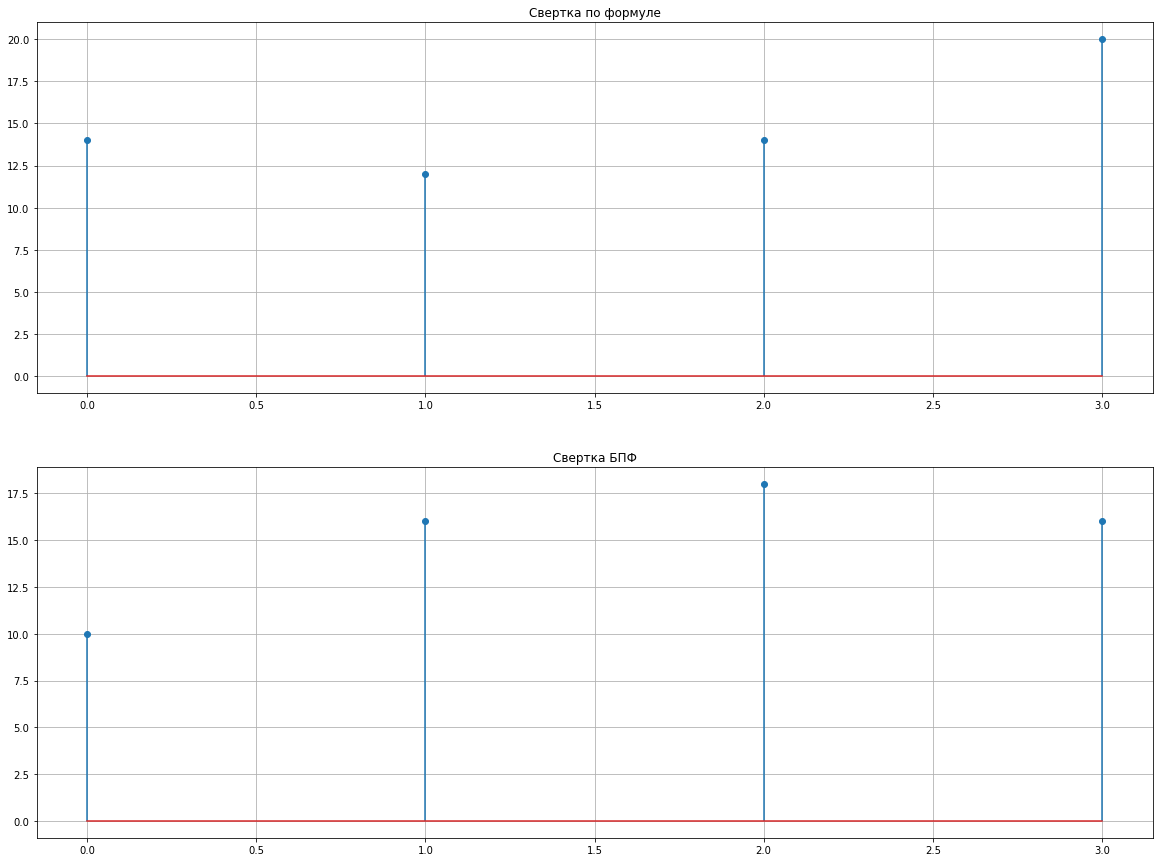

In [107]:
# код
from scipy import signal

# Cсигналы
s1 = [1, 2, 3, 4]
s2 = [3, 2, 1, 0]
a = tuple(s1)
b = tuple(s2)

mycycleconvolve = mycycleConvolve(s1,s2)
#Свертка двух сигналов во временной области равна произведению их спектров в частотной области
convolvefft = np.real(ifft(fft(s1) * fft(s2)))


fig = plt.figure(figsize=(20, 15))

plt.subplot(2, 1, 1)
plt.stem(mycycleconvolve)
plt.title('Свертка по формуле')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(convolvefft)
plt.title('Свертка БПФ')
plt.grid()

### Что получилось? Какие выводы можно сделать?
(для ответа кликнуть два раза на окно ниже)

По итогам расчета и графического отображения можно сделать вывод, что рассмотренные виды сверток (линейная и циклическая) идентичны при использовании прямых формул и готовых библиотек Python.

### Ответьте на вопросы:

1. Для чего нужны АКФ и ВКФ?
2. Когда необходимо использовать свертку?

ответ:

1.
Автокорреляционная функция (АКФ) - показывает зависимость между сигналом и его копией, сдвинутой по времени.
АКФ находит применение в кодировании информации. Автокорреляционная функция помогает находить повторяющиеся участки во временной последовательности, с помощью АКФ можно находить несущую частоту сигнала. Поскольку АКФ есть произведение сигнала и его копии, то физический смысл АКФ - энергия сигнала. В частности, в нулевой момент времени (n = 0) АКФ равна энергии сигнала.

Взаимнокорреляционная функция — стандартный метод оценки степени корреляции двух последовательностей. Она часто используется для поиска в длинной последовательности более короткой заранее известной. Используется при обработке сигналов, например, для распознавания отраженного от объекта локационного сигнала (радаров, сонаров) в условиях помех. Также используется для анализа случайных процессов, например, в измерениях и статистике.

2.
Свертка описывает взаимодействие сигналов между собой. Если один из сигналов - импульсная характеристика фильтра, то свертка входной последовательности с импульсной характеристикой есть ни что иное, как реакция цепи на входное воздействие. Иными словами, результирующий сигнал отражает прохождение сигнала через фильтр.
Связь свертки и корреляции достаточно проста: свертка эквивалентна взаимной корреляции двух последовательностей, причем одна из последовательностей обращена во времени относительно другой.

## Выводы по работе

В ходе выполнения данной лабораторной работы были введены понятия корреляции и свертки для последовательностей. Показана связь автокорреляционной и взаимнокорреляционной функций со сверткой. Описываются свойства свертки, в частности, рассмотрены методы линейной и циклической свертки дискретного сигнала с подробным разбором на примере дискретной последовательности. По итогам работы оценен полученный результат и возможности python-библиотеки - numpy/scipy, matplotlib.
